In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
from sklearn import preprocessing
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Test/daxuli3.csv')
print(data.shape)
print(data.head(10))

(3256, 4)
   Milliseconds  PackVoltx100  Ampsx100  RPM
0             0          1250        37    0
1           100          1250        37    0
2           200          1250        37    0
3           300          1250        37    0
4           400          1250        37    0
5           500          1248        37    0
6           600          1250        37    0
7           700          1248        37    0
8           800          1250        37    0
9           900          1250        37    0


In [3]:
!cp /content/drive/MyDrive/Machine\ Learning\ Test/NotebookML/lssvr.py /content
from lssvr import LSSVR

In [4]:
data.describe()

,Milliseconds,PackVoltx100,Ampsx100,RPM
count,3256.000000,3256.000000,3256.000000,3256.000000
mean,162750.000000,1188.672604,776.113636,6403.512285
std,94007.056473,45.804262,579.316040,2557.755041
min,0.000000,1096.000000,0.000000,0.000000
25%,81375.000000,1150.000000,316.000000,5045.000000
50%,162750.000000,1196.000000,660.000000,6863.000000
75%,244125.000000,1229.000000,1339.000000,8695.000000
max,325500.000000,1250.000000,1935.000000,10020.000000


In [5]:
data.isnull().sum()

Milliseconds    0
PackVoltx100    0
Ampsx100        0
RPM             0
dtype: int64

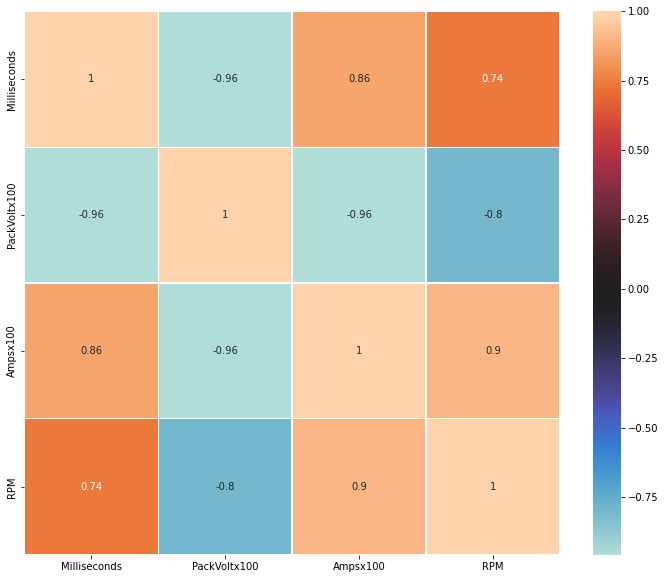

In [6]:
import seaborn as sns
plt.figure(figsize=(12,10)) # Correlation diagram of features  
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, center=0,  annot= True, linewidths=0.2)

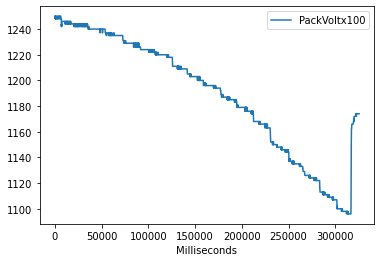

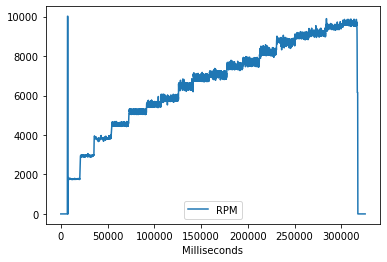

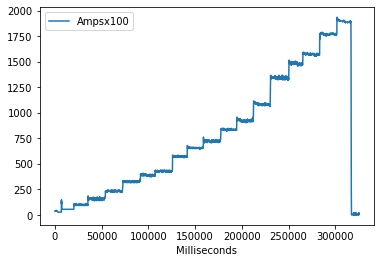

In [7]:
data.plot('Milliseconds','PackVoltx100')
data.plot('Milliseconds','RPM')
data.plot('Milliseconds','Ampsx100')

In [8]:
# Function to remove outlier
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25) # Q1
    q3 = df_in[col_name].quantile(0.75) # Q3
    iqr = q3-q1 # Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

New_data = remove_outlier(data, 'PackVoltx100') # remove oulier
#New_data=data
target = New_data.PackVoltx100 # target of train set   

In [9]:
target

0       1250
1       1250
2       1250
3       1250
4       1250
        ... 
3251    1174
3252    1174
3253    1174
3254    1174
3255    1174
Name: PackVoltx100, Length: 3256, dtype: int64

In [10]:
target=target.to_frame(name='PackVoltx100')

In [11]:
import numpy as np 
New_data = New_data.drop(['Ampsx100','RPM','PackVoltx100'],axis=1)

# function to normalize data
def normalize_data(df):
    for column in df.columns:
      df[column] = df[column]/1000
    return df
def normalize_data2(df):
    for column in df.columns:
      df[column] = df[column]/100
    return df

New_data = normalize_data(New_data)
#source = New_data
#.drop(['PackVoltx100','Ampsx100','RPM'],axis=1)
target=normalize_data2(target)

In [12]:
X=New_data.loc[:3168,:]  #Miliseconds
y=target.loc[:3168,:]    #PackVoltx100

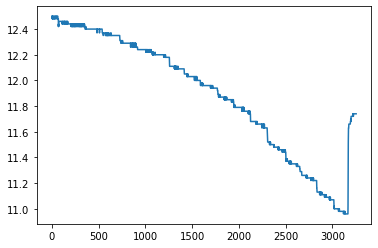

In [13]:
plt.plot(target)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.neural_network import MLPRegressor

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Divide the data into 2 train set and test set
model_lasso=Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
y_predic=model_lasso.predict(X_test)

In [16]:
print('Acc',mean_absolute_percentage_error(y_test,y_predic))
print('MSE', mean_squared_error(y_test, y_predic))

Acc 0.006979118622578082
MSE 0.009015204302821177


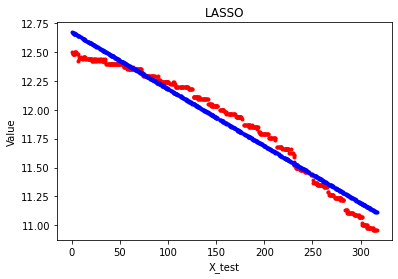

In [17]:
#plt.scatter(y_test,y_predic) # plot to compare y_predicted and y_test
plt.plot(X_test,y_test,'.r')
plt.plot(X_test,y_predic,'.b')
plt.xlabel('X_test') # assign label for x axis
plt.ylabel('Value') # assign label for y axis
plt.title('LASSO') # assign title for diagram
plt.show()

In [18]:
X_train_gbt, X_test_gbt, y_train_gbt, y_test_gbt = train_test_split(X, y, test_size=0.2)
model_gbt=GradientBoostingRegressor()
model_gbt.fit(X_train_gbt,y_train_gbt.values.ravel())
y_predic_gbt=model_gbt.predict(X_test_gbt)

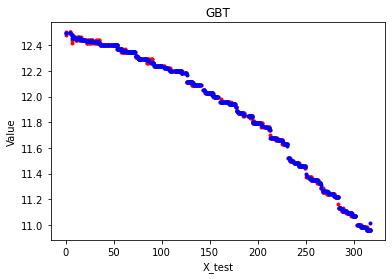

In [19]:
 # plot to compare y_predicted and y_test
plt.plot(X_test_gbt,y_test_gbt,'.r')
plt.plot(X_test_gbt,y_predic_gbt,'.b')
plt.xlabel('X_test') # assign label for x axis
plt.ylabel('Value') # assign label for y axis
plt.title('GBT') # assign title for diagram
plt.show()

In [20]:
print('Error',mean_absolute_percentage_error(y_test_gbt,y_predic_gbt))
print('MSE', mean_squared_error(y_test_gbt, y_predic_gbt))

Error 0.00034310829436836015
MSE 7.282605844861103e-05


In [21]:
X_train_lssvr,X_test_lssvr,y_train_lssvr,y_test_lssvr= train_test_split(X,y, test_size=0.2)
model_lssvr=LSSVR(kernel='rbf', gamma=2**-4)
model_lssvr.fit(X_train_lssvr,y_train_lssvr)
y_predic_lssvr = model_lssvr.predict(X_test_lssvr)

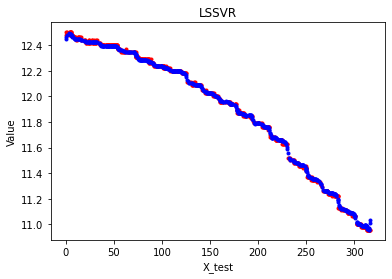

In [22]:
plt.plot(X_test_lssvr,y_test_lssvr,'.r')
plt.plot(X_test_lssvr,y_predic_lssvr,'.b')
plt.xlabel('X_test') # assign label for x axis
plt.ylabel('Value') # assign label for y axis
plt.title('LSSVR') # assign title for diagram
plt.show()

In [23]:
print('Error',mean_absolute_percentage_error(y_test_lssvr,y_predic_lssvr))
print('MSE', mean_squared_error(y_test_lssvr, y_predic_lssvr))

Error 0.0006326574127025145
MSE 0.00011133018942392653


In [24]:
X_train_mlp,X_test_mlp,y_train_mlp,y_test_mlp=train_test_split(X,y, test_size=0.2)
model_mlp=MLPRegressor(max_iter=500)
model_mlp.fit(X_train_mlp,y_train_mlp.values.ravel())
y_predic_mlp=model_mlp.predict(X_test_mlp)

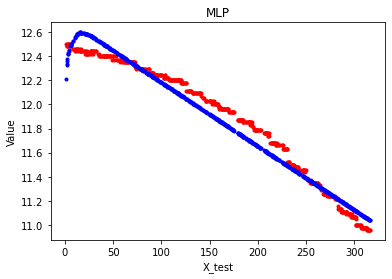

In [25]:
plt.plot(X_test_mlp,y_test_mlp,'.r')
plt.plot(X_test_mlp,y_predic_mlp,'.b')
plt.xlabel('X_test') # assign label for x axis
plt.ylabel('Value') # assign label for y axis
plt.title('MLP') # assign title for diagram
plt.show()

In [26]:
print('Error',mean_absolute_percentage_error(y_test_mlp,y_predic_mlp))
print('MSE', mean_squared_error(y_test_mlp, y_predic_mlp))

Error 0.0068340010457115475
MSE 0.008917393029846944
